Based on the evoked potential (EP) network mapping from PRESIDIO PR01, this notebook will generate a chord diagram and in-/out-degree plots. 

In [1]:
%%time
import dill as pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import re

import holoviews as hv
hv.extension("matplotlib")

import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

CPU times: user 3.07 s, sys: 348 ms, total: 3.42 s
Wall time: 6.74 s


In [18]:
### helper functions

# all the sites we record from
node_list = ['LA1', 'LA2', 'LA3', 'LA4', 'LA5',
             'LH1', 'LH2', 'LH3', 'LH4', 'LH5',
             'LOFC1', 'LOFC2', 'LOFC6', 'LOFC7', 'LOFC8',
             'LSGC2', 'LSGC3', 'LSGC4', 
             'LVC1', 'LVC2', 'LVC3',
             'RA1', 'RA2', 'RA3', 'RA4', 'RA5',
             'RH3', 'RH4', 'RH5',
             'ROFC1', 'ROFC2', 'ROFC3', 'ROFC5', 'ROFC6',
             'RSGC3', 'RSGC4', 'RSGC5', 'RSGC6',
             'RVC1', 'RVC2', 'RVC3']

def matrix_to_rows(n1_adj):
    ''' encode every value in n1_adj_df as a row in a DataFrame: (stim, target, weight=z_score)
    '''
    n1_edge_df = n1_adj
    n1_full_df = pd.DataFrame()
    for r in n1_edge_df.index:
        for c in n1_edge_df.columns:
            weight = n1_edge_df.loc[r,c]
            if weight > 0:
                df = pd.DataFrame([[r, c, weight]], columns=['stim','target','weight'])
                n1_full_df = n1_full_df.append(df)
    return n1_full_df

def map_to_color(node):
    # old colormap Ghassan had: 
    #colormap = {'LA':'orange',"RA":"darksalmon","LH":'green',"RH":'yellow', "ROFC":'blue',\
    #            "LOFC":'purple', "LVC":"white", "RVC":'pink',"LSGC":'cream', "RSGC":"gold",\}
    colormap = {'LA': '#ce6dbd', 'LH': '#fd8d3c', 'LOFC': '#74c476', 'LSGC': '#9467bd', 'LVC': '#1f77b4', 
                'RA': '#d62728', 'RH': '#6baed6', 'ROFC': '#2ca02c', 'RSGC': '#e7cb94', 'RVC': '#de9ed6'}
    location = re.sub('[0-9]',"", node ).replace("_", "").split(' ')[0] # take everything before space
    return colormap[location]

def remove_stim_to_stim(df):
    ''' if index format = "[Region]_[Pos elec]_[Neg elec]" per stim electrode,
    will for each row NaN the "[Region][Pos elec]" and "[Region][Neg elec]"
    '''
    out = df
    for i, row in df.iterrows():
        stim_s = i.split('_')
        reg, pos, neg = stim_s[0], stim_s[1], stim_s[2]
        
        out.at[i, f'{reg}{pos}'] = np.nan
        out.at[i, f'{reg}{neg}'] = np.nan
    return out

def create_G(edge_vals, node_list = node_list, weight_thresh = 0, thickest_edge = 5,
            hemisphere = 'both'):
    '''
        weight_thresh: 
            6 # Keller et al 2014 uses 6 as z-score threshold
        thickest_edge:
            5 # suitably thick edge for display
        hemisphere:
            R / L / both
    '''
    G = nx.OrderedDiGraph()
    for n in node_list:
        if hemisphere != 'both':
            if str(n)[0] == hemisphere:
                G.add_node(n)
        else:
            G.add_node(n)
    widths = []
    if hemisphere != 'both':
        filt_edge_vals = edge_vals.loc[(edge_vals['stim'].str[0] == hemisphere) & 
                                       (edge_vals['target'].str[0] == hemisphere)]
    else:
        filt_edge_vals = edge_vals
    for i,row in filt_edge_vals.iterrows():
        a,b = row['stim'], row['target']
        weight = row['weight']
        if weight > weight_thresh and a in G.nodes and b in G.nodes:
            thick = (weight - weight_thresh) / (filt_edge_vals.weight.max() - weight_thresh) * thickest_edge
            widths.append(thick)
            G.add_edge(a, b, width=thick, weight=weight)
    return G, widths

### importing and reshaping data

In [20]:
sigN1_conn_matrix = pd.read_csv('./source_data/sig_N1_edges.csv', index_col = 0)
sigN1_conn_matrix

,ROFC1,ROFC2,ROFC3,ROFC5,ROFC6,RSGC3,RSGC4,RSGC5,RSGC6,RH3,...,LA2,LA3,LA4,LA5,RVC1,RVC2,RVC3,LVC1,LVC2,LVC3
stim_site,,,,,,,,,,,,,,,,,,,,,
LA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.595381,NaN
LA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.595381,NaN
LH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.512155,71.119087,69.105239,51.677278,NaN,NaN,NaN,NaN,NaN,6.003537
LH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.512155,71.119087,69.105239,51.677278,NaN,NaN,NaN,NaN,NaN,6.003537
LOFC7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOFC8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LSGC3,41.360364,21.642536,21.167611,39.260465,39.324957,42.784725,57.302794,8.117008,12.567986,13.556213,...,16.336485,13.889491,12.916646,11.964580,22.798114,19.832591,19.800373,23.118496,19.042609,20.497221
LSGC4,41.360364,21.642536,21.167611,39.260465,39.324957,42.784725,57.302794,8.117008,12.567986,13.556213,...,16.336485,13.889491,12.916646,11.964580,22.798114,19.832591,19.800373,23.118496,19.042609,20.497221
LVC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# convert filtered for sig connectivity matrix to long format
# each row encodes stim site, target site, and weight value
sigN1_all_edges = matrix_to_rows(sigN1_conn_matrix)
n1_all_edges = sigN1_all_edges 

In [22]:
# add electrode-agnostic region labels
n1_all_edges['stim_reg'] = n1_all_edges.stim.str[:-1]
n1_all_edges['target_reg'] = n1_all_edges.target.str[:-1]
n1_all_edges

,stim,target,weight,stim_reg,target_reg
0,LA2,LOFC2,4.811022,LA,LOFC
0,LA2,LOFC6,7.549993,LA,LOFC
0,LA2,LOFC7,15.410896,LA,LOFC
0,LA2,LOFC8,8.500351,LA,LOFC
0,LA2,LH1,8.938190,LA,LH
...,...,...,...,...,...
0,RVC2,LSGC4,10.310305,RVC,LSGC
0,RVC2,LH1,4.721920,RVC,LH
0,RVC2,LA1,7.557095,RVC,LA
0,RVC2,LVC1,7.006303,RVC,LVC


In [12]:
# summarize over regions
n1_by_reg = n1_all_edges.drop(columns = ['stim', 'target'])
n1_by_reg_sum = n1_by_reg.groupby(by=['stim_reg', 'target_reg'])['weight'].sum()

In [14]:
n1_by_reg_sum_df = pd.DataFrame(n1_by_reg_sum).reset_index()
n1_by_reg_sum_df

,stim_reg,target_reg,weight
0,LA,LH,51.904515
1,LA,LOFC,72.544524
2,LA,LVC,9.190762
3,LH,LA,629.772188
4,LH,LOFC,63.798935
5,LH,LVC,12.007074
6,LH,RA,13.122808
7,LSGC,LA,138.046946
8,LSGC,LH,37.603012
9,LSGC,LOFC,281.051473


In [17]:
# get region names for plotting
regs = list(set(n1_by_reg_sum_df['stim_reg'].unique().tolist() + n1_by_reg_sum_df['target_reg'].unique().tolist()))
regs_dataset = hv.Dataset(pd.DataFrame(regs, columns = ['Region']))

### plot chord connectivity diagram

In [18]:
hv.output(fig='svg', size=300)

In [19]:
%%opts Chord [labels="Region"]
%%opts Chord (node_color="Region" node_cmap="Category10" edge_color="stim_reg" edge_cmap='Category10')
%%opts Chord (node_size=0 edge_alpha=0.9 edge_linewidth=1.0)

right_dataset = hv.Dataset(pd.DataFrame(['RA', 'RH', 'RVC', 'RSGC', 'ROFC'], columns = ['Region']))
c = hv.Chord((n1_by_reg_sum_df[(n1_by_reg_sum_df['stim_reg'].str[0]=='R') & \
                               (n1_by_reg_sum_df['target_reg'].str[0]=='R')],
            right_dataset), ['stim_reg', 'target_reg'])
c

:Chord   [stim_reg,target_reg]   (weight)

### plot in-/out-degree bar charts

In [23]:
# create right hemisphere full graph (stim at all 5 R bipolar sites)
G, widths = create_G(n1_all_edges, hemisphere = 'R')

In [25]:
# create graph theoretic metrics
causal_df = pd.DataFrame(G.in_degree(), columns=['Node', 'in_degree'])
tmp_df = pd.DataFrame(G.out_degree(),columns=['Node', 'out_degree'])
causal_df['out_degree'] = tmp_df.out_degree
causal_df = causal_df.set_index('Node')
causal_df['weighted_in_degree'] = [d[-1] for d in G.in_degree(causal_df.index,'weight')]
causal_df['weighted_out_degree'] = [d[-1] for d in G.out_degree(causal_df.index,'weight')]
causal_df['flow'] = causal_df['out_degree'] - causal_df['in_degree']
causal_df['weighted_flow'] = causal_df['weighted_out_degree'] - causal_df['weighted_in_degree']

<IPython.core.display.Javascript object>


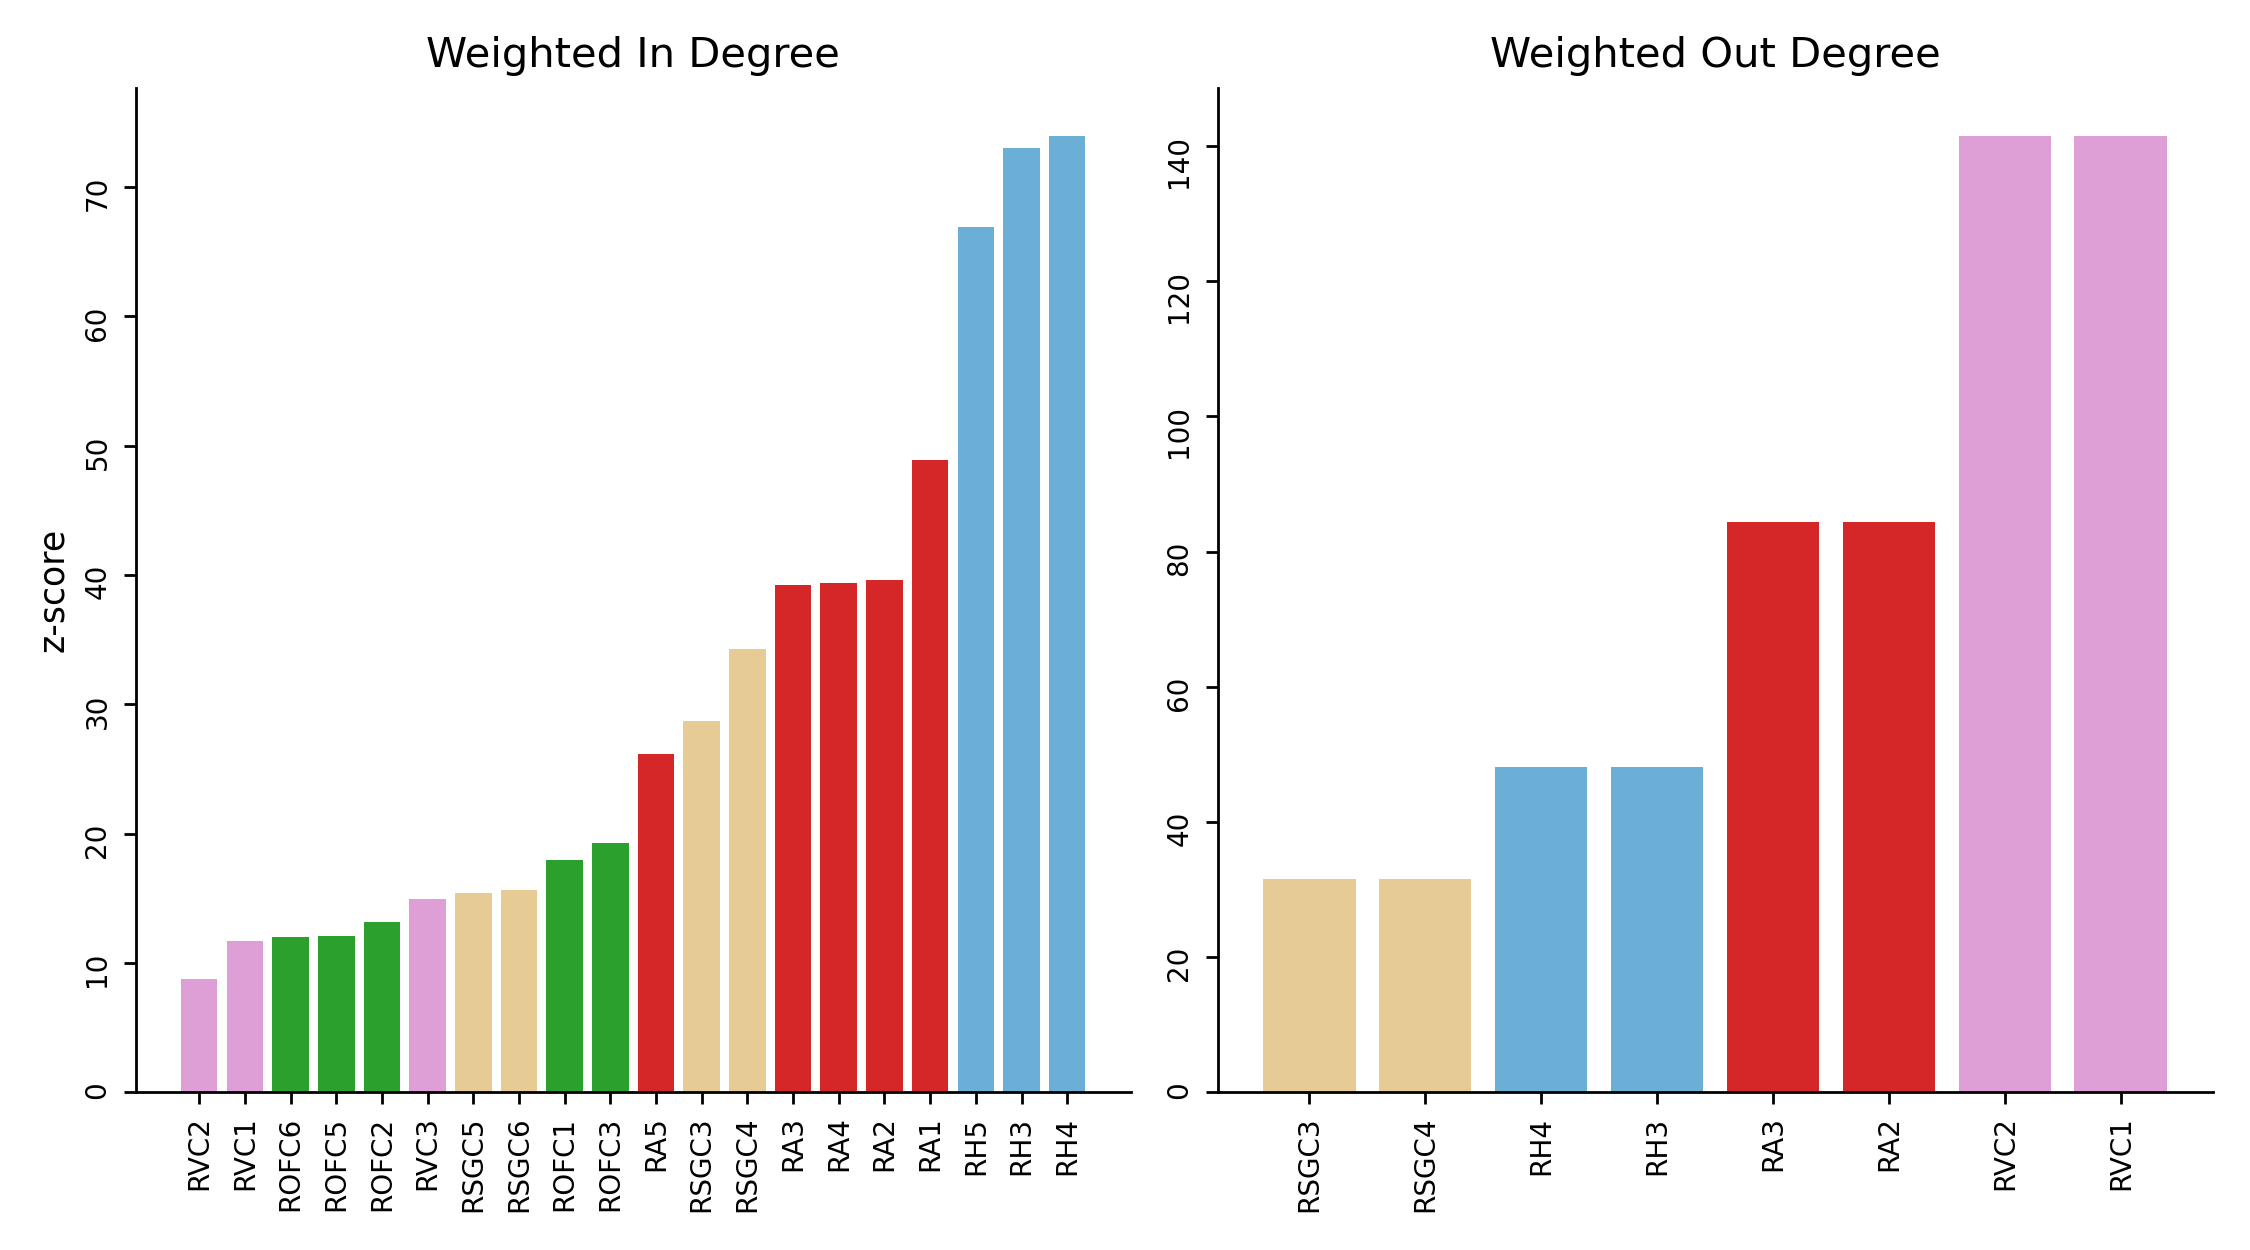

In [28]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9, 5]

fig, ax = plt.subplots(nrows = 1, ncols = 2)
sort_ins = causal_df['weighted_in_degree'].argsort()
for loc, val in zip(causal_df.index[sort_ins], causal_df['weighted_in_degree'].sort_values()):
    ax[0].bar(loc, val, color = map_to_color(loc))
ax[0].tick_params(labelrotation=90, labelsize = 8)
ax[0].set_title('Weighted In Degree')

sort_outs = causal_df['weighted_out_degree'].argsort()
for loc, val in zip(causal_df.index[sort_outs], causal_df['weighted_out_degree'].sort_values()):
    if val > 0:
        ax[1].bar(loc, val, color = map_to_color(loc))
ax[1].tick_params(labelrotation=90, labelsize = 8)
ax[1].set_title('Weighted Out Degree')
#causal_df['weighted_in_degree'].sort_values().plot(kind='bar', title=' Weighted In Degree', ax = ax[0])
#causal_df['weighted_out_degree'].sort_values().plot(kind='bar', title=' Weighted Out Degree', ax = ax[1])
ax[0].set_ylabel('z-score')
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.tight_layout()
plt.show()